In [123]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn import cluster
import numpy as np


In [124]:
data = pd.read_csv('Preprocessed.csv')

In [125]:
data

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,0.760870,0.716667,0.712121
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,0.684783,0.550000,0.712121
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.010870,0.000000,0.000000
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.489130,0.483333,0.478788
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,0.804348,0.633333,0.769697
...,...,...,...,...,...,...,...,...,...
2023,18-22,Male,Dhaka University (DU),Other,2,3.00 - 3.39,0.793478,1.000000,0.669697
2024,18-22,Female,Bangladesh Agricultural University (BAU),Engineering - CS,3,3.00 - 3.39,0.826087,0.800000,0.748485
2025,18-22,Male,American International University Bangladesh (...,Engineering - CS,2,2.50 - 2.99,0.554348,0.633333,0.530303
2026,23-26,Female,Dhaka University (DU),Other,3,3.40 - 3.79,0.847826,1.000000,0.772727


In [126]:
data.describe()

,Year,Stress value,Anxiety value,Depression value
count,2028.000000,2028.000000,2028.000000,2028.000000
mean,2.311144,0.585038,0.585585,0.529380
std,1.190877,0.198531,0.260009,0.249647
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.456522,0.383333,0.333333
50%,2.000000,0.586957,0.600000,0.527273
75%,3.000000,0.750000,0.800000,0.715152
max,4.000000,1.000000,1.000000,1.000000


## K-Means

As we can see, Stress, Anxiety and Depression have different ranges so we decided to normalize them to use K-Means.

In [127]:
# data['Stress value normalized'] = zscore(data['Stress value'])
# data['Anxiety value normalized'] = zscore(data['Anxiety value'])
# data['Depression value normalized'] = zscore(data['Depression value'])

We decided to make a cluster analysis between Depression and Anxiety. We use the Elbow Method to find out the number of clusters needed

Text(0, 0.5, 'SSE')

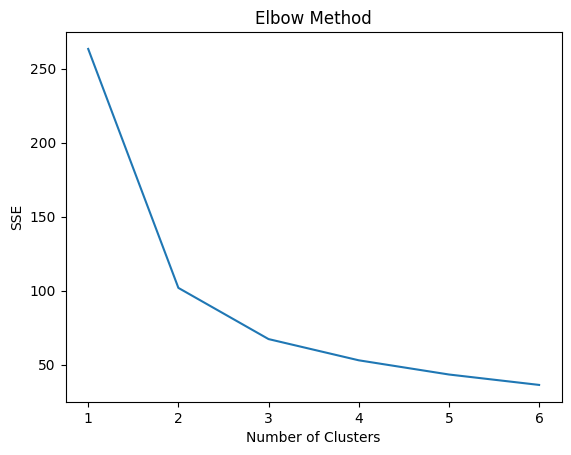

In [128]:
numClusters = [1,2,3,4,5,6]
SSE = []

for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    k_means.fit(data[['Depression value', 'Anxiety value']])
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [129]:
kmeans = cluster.KMeans(n_clusters=3, init="k-means++", n_init = 10)
kmeans = kmeans.fit(data[['Depression value', 'Anxiety value']])
kmeans.cluster_centers_

array([[0.26599018, 0.29882773],
       [0.80760527, 0.86791126],
       [0.5305269 , 0.60356201]])

In [130]:
data['Cluster number'] = kmeans.labels_

In [131]:
data

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value,Cluster number
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,0.760870,0.716667,0.712121,1
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,0.684783,0.550000,0.712121,2
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.010870,0.000000,0.000000,0
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.489130,0.483333,0.478788,2
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,0.804348,0.633333,0.769697,1
...,...,...,...,...,...,...,...,...,...,...
2023,18-22,Male,Dhaka University (DU),Other,2,3.00 - 3.39,0.793478,1.000000,0.669697,1
2024,18-22,Female,Bangladesh Agricultural University (BAU),Engineering - CS,3,3.00 - 3.39,0.826087,0.800000,0.748485,1
2025,18-22,Male,American International University Bangladesh (...,Engineering - CS,2,2.50 - 2.99,0.554348,0.633333,0.530303,2
2026,23-26,Female,Dhaka University (DU),Other,3,3.40 - 3.79,0.847826,1.000000,0.772727,1


In [132]:
# data[data["Depression value">25 & "Anxiety value"<5]]

<Axes: xlabel='Depression value', ylabel='Anxiety value'>

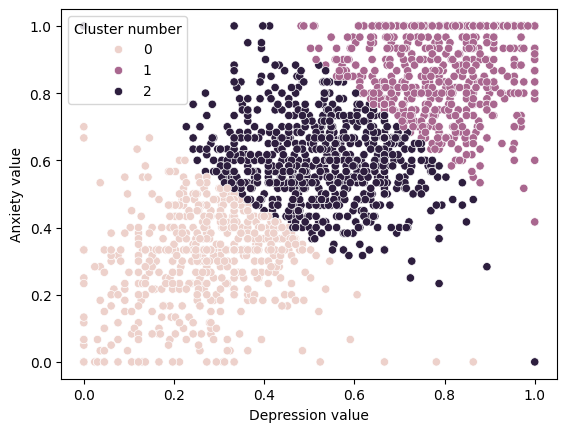

In [133]:
sns.scatterplot(data=data, x='Depression value', y='Anxiety value', hue='Cluster number')

# DBSCAN

In [134]:
data

,Age,Gender,University,Department,Year,Current CGPA,Stress value,Anxiety value,Depression value,Cluster number
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS,2,2.50 - 2.99,0.760870,0.716667,0.712121,1
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS,3,3.00 - 3.39,0.684783,0.550000,0.712121,2
2,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.010870,0.000000,0.000000,0
3,18-22,Male,American International University Bangladesh (...,Engineering - CS,3,3.00 - 3.39,0.489130,0.483333,0.478788,2
4,18-22,Male,North South University (NSU),Engineering - CS,2,2.50 - 2.99,0.804348,0.633333,0.769697,1
...,...,...,...,...,...,...,...,...,...,...
2023,18-22,Male,Dhaka University (DU),Other,2,3.00 - 3.39,0.793478,1.000000,0.669697,1
2024,18-22,Female,Bangladesh Agricultural University (BAU),Engineering - CS,3,3.00 - 3.39,0.826087,0.800000,0.748485,1
2025,18-22,Male,American International University Bangladesh (...,Engineering - CS,2,2.50 - 2.99,0.554348,0.633333,0.530303,2
2026,23-26,Female,Dhaka University (DU),Other,3,3.40 - 3.79,0.847826,1.000000,0.772727,1


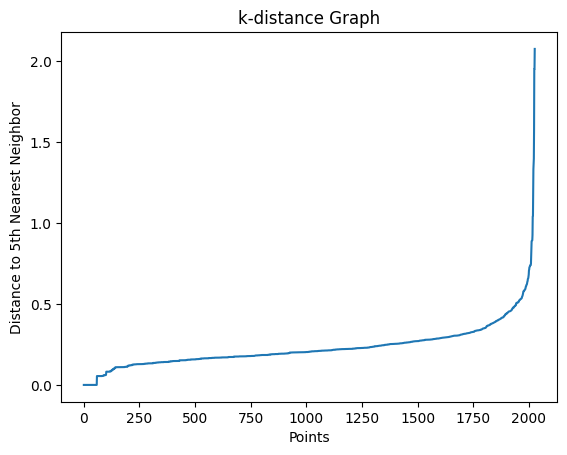

Best eps: 1.5
Best min_samples: 3
Best silhouette score: 0.4568


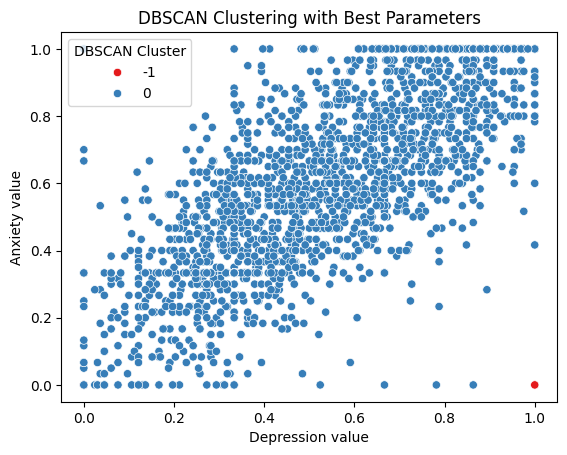

In [139]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score


# Normalize the data
data_normalized = data[['Depression value', 'Anxiety value', 'Stress value']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_normalized)

# Step 1: k-distance graph to find the best eps
k = 5  # Typically, k is set to min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Sort distances for each point and plot the k-distance graph
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()

# From the plot, look for the "elbow" to choose a suitable eps value.
# This will give you an idea of a good eps value, typically where the plot starts to level off.

# Step 2: Grid Search for the best eps and min_samples
eps_values = np.linspace(0.1, 1.5, 15)  # Adjust based on the k-distance plot
min_samples_values = [3, 4, 5, 6, 7, 8, 10]

best_score = -1
best_eps = None
best_min_samples = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)
        
        # Skip cases where all points are considered noise (label == -1 for all)
        if len(set(labels)) == 1:
            continue
        
        # Calculate silhouette score to evaluate clustering quality
        if len(set(labels)) > 1:  # Ensure more than 1 cluster
            score = silhouette_score(data_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

# Step 3: Print the best eps, min_samples, and silhouette score
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best silhouette score: {best_score:.4f}")

# Visualize the clusters with the best parameters
data['DBSCAN Cluster'] = best_labels
sns.scatterplot(data=data, x='Depression value', y='Anxiety value', hue='DBSCAN Cluster', palette='Set1')
plt.title("DBSCAN Clustering with Best Parameters")
plt.xlabel("Depression value")
plt.ylabel("Anxiety value")
plt.show()

## K-Means++

Now we do the cluster analysis for three dimesions (Depression value, Stress value and Anxiety value)

Searching best number of clusters using the Elbow Method

In [136]:
numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k, init='k-means++',random_state=0, n_init=10)
    k_means.fit(data[['Depression value', 'Stress value', 'Anxiety value']])
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

AttributeError: 'numpy.int64' object has no attribute 'KMeans'

In [ ]:
kmeans_3d = cluster.KMeans(n_clusters=3, init="k-means++", n_init = 10)
kmeans_3d = kmeans.fit(data[['Depression value', 'Stress value', 'Anxiety value']])
kmeans_3d.cluster_centers_

data['Cluster number'] = kmeans.labels_

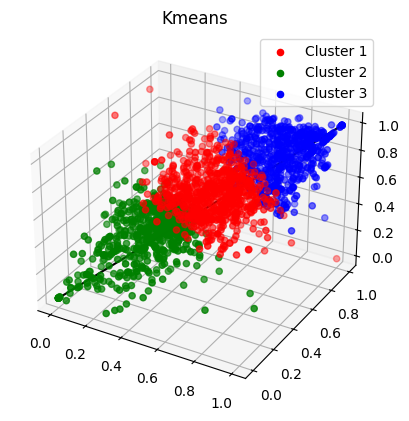

In [ ]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 1, 1000)
yline = np.linspace(0, 1, 1000)
zline = np.linspace(0, 1, 1000)

kplot.plot3D(xline, yline, zline, 'black')

cluster1 = data[data['Cluster number'] == 0]
cluster2 = data[data['Cluster number'] == 1]
cluster3 = data[data['Cluster number'] == 2]

kplot.scatter3D(cluster1["Depression value"], cluster1["Stress value"], cluster1["Anxiety value"], c='red', label = 'Cluster 1')
kplot.scatter3D(cluster2["Depression value"], cluster2["Stress value"], cluster2["Anxiety value"], c ='green', label = 'Cluster 2')
kplot.scatter3D(cluster3["Depression value"], cluster3["Stress value"], cluster3["Anxiety value"], c ='blue', label = 'Cluster 3')

plt.legend()

plt.title("K-Means 3D")

plt.show()